In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset : https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
atheletes_df = pd.read_csv('athlete_events.csv')
regions_df = pd.read_csv('noc_regions.csv')

In [3]:
data_df = pd.merge(atheletes_df, regions_df, on='NOC', how='left')

In [4]:
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
data_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [6]:
data_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/kashif/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/kashif/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

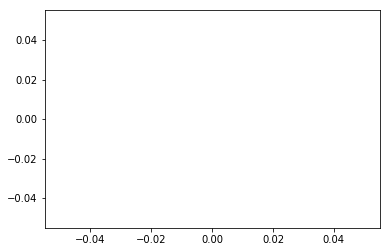

In [8]:
sns.distplot(data_df['Age'])

In [9]:
age_df = data_df['Age']

In [11]:
age_df = pd.to_numeric(data_df['Age'], errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)

In [12]:
age_df

0         24
1         23
2         24
3         34
4         21
5         21
6         25
7         25
8         27
9         27
10        31
11        31
12        31
13        31
14        33
15        33
16        33
17        33
18        31
19        31
20        31
21        31
22        33
23        33
24        33
25        33
26        18
27        18
28        26
29        26
          ..
271086    23
271087    19
271088    19
271089    34
271090    38
271091    32
271092    21
271093    21
271094    25
271095    25
271096    29
271097    29
271098    33
271099    36
271100    26
271101    24
271102    19
271103    23
271104    22
271105    23
271106    27
271107    21
271108    24
271109    28
271110    33
271111    29
271112    27
271113    27
271114    30
271115    34
Name: Age, Length: 261642, dtype: int64

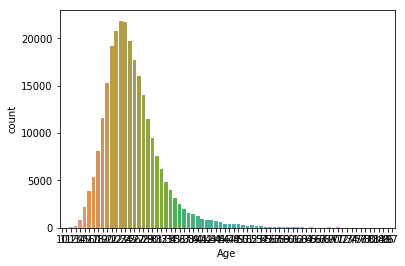

In [13]:
sns.countplot(age_df)

In [ ]:
data_df.loc[data_df['Medal'].isnull()]

In [14]:
medalists_df = data_df.loc[~data_df['Medal'].isnull()]

In [15]:
medalists_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [16]:
def plot_column(my_df, col, chart_type='Histogram', dtype=int,
               bin_size=25):
    temp_df = pd.to_numeric(my_df[col], errors='coerce')
    temp_df = temp_df.dropna()
    temp_df = temp_df.astype(dtype)
    if chart_type=='Histogram':
        ax = sns.countplot(temp_df)
    elif chart_type=='Density':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()

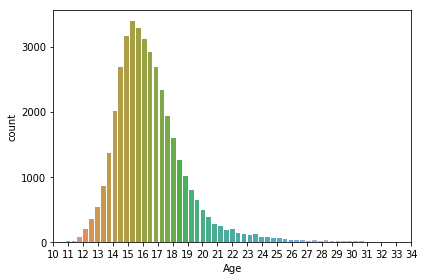

In [17]:
plot_column(medalists_df, 'Age')

### Calculate Skewness

In [25]:
from scipy.stats import skew
age_df = pd.to_numeric(medalists_df['Age'], errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)
print("Skewness is {}".format(skew(age_df)))
print("Mean is {}".format(np.mean(age_df)))
print("Median is {}".format(np.median(age_df)))

Skewness is 1.497531959387686
Mean is 25.925174771452717
Median is 25.0


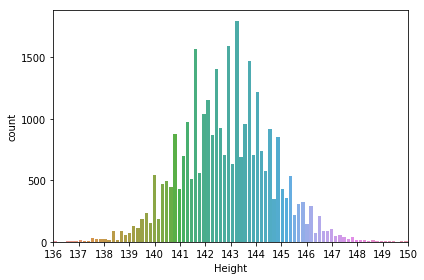

In [26]:
plot_column(medalists_df, 'Height', bin_size=15)

In [28]:
Height_df = pd.to_numeric(medalists_df['Height'], errors='coerce')
Height_df = Height_df.dropna()
Height_df = Height_df.astype(int)
print("Skewness is {}".format(skew(Height_df)))
print("Mean is {}".format(np.mean(Height_df)))
print("Median is {}".format(np.median(Height_df)))

Skewness is 0.046825246979302765
Mean is 177.55419670442842
Median is 178.0


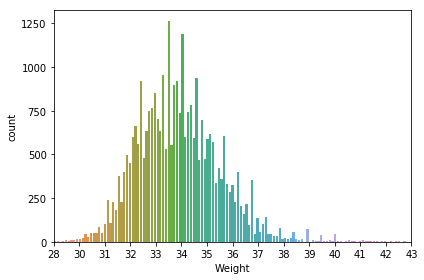

In [29]:
plot_column(medalists_df, 'Weight', bin_size=15)

In [31]:
Weight_df = pd.to_numeric(medalists_df['Weight'], errors='coerce')
Weight_df = Weight_df.dropna()
Weight_df = Weight_df.astype(int)
print("Skewness is {}".format(skew(Weight_df)))
print("Mean is {}".format(np.mean(Weight_df)))
print("Median is {}".format(np.median(Weight_df)))

Skewness is 0.6921002780813605
Mean is 73.76723798266352
Median is 73.0


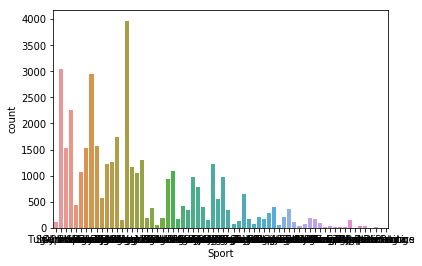

In [32]:
sports_df = medalists_df[~medalists_df['Sport'].isnull()]
sns.countplot(medalists_df['Sport'])

In [ ]:
sum(medalists_df['Sport'].isnull())

In [33]:
sports_count=medalists_df['Sport'].value_counts().nlargest(25).to_frame()

In [34]:
#sports_count.reset_index(inplace=True)
print(sports_count)


                      Sport
Athletics              3969
Swimming               3048
Rowing                 2945
Gymnastics             2256
Fencing                1743
Football               1571
Ice Hockey             1530
Hockey                 1528
Wrestling              1296
Cycling                1263
Sailing                1232
Shooting               1228
Canoeing               1165
Basketball             1080
Handball               1060
Water Polo             1057
Volleyball              969
Equestrianism           965
Boxing                  944
Cross Country Skiing    776
Weightlifting           646
Speed Skating           580
Judo                    547
Alpine Skiing           428
Diving                  427


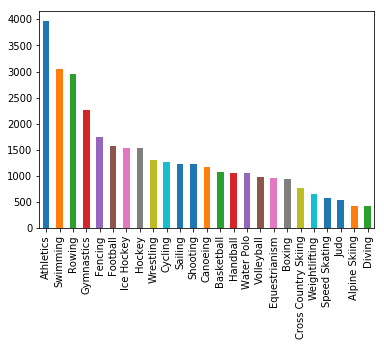

In [35]:
ax = sports_count.plot.bar(y='Sport')
ax.get_legend().remove()

In [36]:
year_count_df=data_df['Year'].value_counts().to_frame()

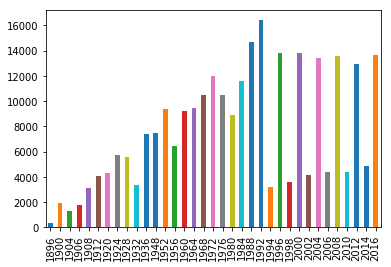

In [37]:
year_count_df.sort_index(inplace=True)
ax = year_count_df.plot.bar(y='Year')
ax.get_legend().remove()